**NOAA CLimate Data Preprocessing and EDA**

In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

Combining individual station climate data obtained from NOAA website. The stations for which data was collected are: San Diego International Airport,Imperial Beach (Pacific Ocean), Ocean Side Harbor and Ramona Airport. The data collected is from 1st Jan 2012 to 1 May 2025.

In [45]:
BASE_DIR = os.getcwd()

csv_files = [
    'raw_climate_data/4011578.csv',
    'raw_climate_data/4011579.csv',
    'raw_climate_data/4011580.csv',
    'raw_climate_data/4011582.csv',
    'raw_climate_data/4011594.csv',
    'raw_climate_data/4011595.csv',
    'raw_climate_data/4011667_ramon.csv',
    'raw_climate_data/4011670_ramon2.csv'
]

df_combined = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)


merged_data = 'climate.csv'
df_combined.to_csv(merged_data, index=False)

df = pd.read_csv(merged_data)

/var/folders/6c/_hkw_cbx7j33k946pnhyt8yw0000gn/T/ipykernel_46504/2110892124.py:14: DtypeWarning: Columns (3,21,27,28,29,30,31,32,33,43,44,49,50,52,54,70,72,89,96) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combined = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
/var/folders/6c/_hkw_cbx7j33k946pnhyt8yw0000gn/T/ipykernel_46504/2110892124.py:14: DtypeWarning: Columns (44,53,72,89) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combined = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
/var/folders/6c/_hkw_cbx7j33k946pnhyt8yw0000gn/T/ipykernel_46504/2110892124.py:14: DtypeWarning: Columns (3,21,27,28,29,30,31,32,33,34,37,38,43,44,45,49,50,54,56,57,59,60,61,62,63,64,70,72,73,89,96,97,98,99,100,101,102,103,104,105,106,107,108,115,118,120) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combined = pd.concat([pd.read_csv(file) for file in csv_fil

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652169 entries, 0 to 652168
Data columns (total 6 columns):
 #   Column                          Non-Null Count   Dtype    
---  ------                          --------------   -----    
 0   Date                            652169 non-null  period[M]
 1   Quarter                         652169 non-null  object   
 2   DailyAverageWindSpeed           17734 non-null   float64  
 3   DailyAverageRelativeHumidity    4567 non-null    float64  
 4   DailyAverageDryBulbTemperature  17533 non-null   object   
 5   DailyPeakWindDirection          17975 non-null   object   
dtypes: float64(2), object(3), period[M](1)
memory usage: 29.9+ MB


In [16]:
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df['YearMonth'] = df['DATE'].dt.to_period('M')
df['Quarter'] = df['DATE'].dt.quarter.apply(lambda x: f'Q{x}')

df = df[['YearMonth', 'Quarter', 'DailyAverageWindSpeed','DailyAverageRelativeHumidity', 'DailyAverageDryBulbTemperature','DailyPeakWindDirection']]

df.rename(columns={'YearMonth': 'Date'}, inplace=True)

/var/folders/6c/_hkw_cbx7j33k946pnhyt8yw0000gn/T/ipykernel_46504/3677336709.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'YearMonth': 'Date'}, inplace=True)


In [17]:
quarter_summary = df.groupby('Quarter').agg(total_rows=('Quarter', 'size'),missing_values=('Quarter', lambda x: x.isna().sum())).reset_index()

print(quarter_summary)

  Quarter  total_rows  missing_values
0      Q1      177057               0
1      Q2      163957               0
2      Q3      151658               0
3      Q4      159497               0


In [20]:
missing_per_quarter = df.groupby('Quarter')[['DailyAverageWindSpeed','DailyAverageRelativeHumidity','DailyAverageDryBulbTemperature','DailyPeakWindDirection']].apply(lambda x: x.isna().sum())

print(missing_per_quarter)

         DailyAverageWindSpeed  DailyAverageRelativeHumidity  \
Quarter                                                        
Q1                      172410                        175910   
Q2                      159495                        162774   
Q3                      147247                        150462   
Q4                      155283                        158456   

         DailyAverageDryBulbTemperature  DailyPeakWindDirection  
Quarter                                                          
Q1                               172451                  172355  
Q2                               159520                  159414  
Q3                               147377                  147195  
Q4                               155288                  155230  


In [23]:
df['DailyAverageDryBulbTemperature'] = pd.to_numeric(df['DailyAverageDryBulbTemperature'], errors='coerce')
df['DailyPeakWindDirection'] = pd.to_numeric(df['DailyPeakWindDirection'], errors='coerce')

/var/folders/6c/_hkw_cbx7j33k946pnhyt8yw0000gn/T/ipykernel_46504/2746132943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DailyAverageDryBulbTemperature'] = pd.to_numeric(df['DailyAverageDryBulbTemperature'], errors='coerce')
/var/folders/6c/_hkw_cbx7j33k946pnhyt8yw0000gn/T/ipykernel_46504/2746132943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DailyPeakWindDirection'] = pd.to_numeric(df['DailyPeakWindDirection'], errors='coerce')


In [24]:
total = len(df)
null = df.isnull().sum()
populated_data = total-null
print(populated_data)

Date                              652169
Quarter                           652169
DailyAverageWindSpeed              17734
DailyAverageRelativeHumidity        4567
DailyAverageDryBulbTemperature     17359
DailyPeakWindDirection             17580
dtype: int64


For the simulation we have a grid of 25x25 cells, which indicates we need atleast 625 values for climate variables to successfully simulate the wildfires.
Out of 652169 rows in the climate data, we have sufficient values for the climate variables to be able to simulate the project.

In [31]:
stats_per_quarter = df.groupby('Quarter').agg(
    max_DailyAverageWindSpeed=('DailyAverageWindSpeed', 'max'),
    min_DailyAverageWindSpeed=('DailyAverageWindSpeed', 'min'),
    std_DailyAverageWindSpeed=('DailyAverageWindSpeed', 'std'),
    max_DailyAverageRelativeHumidity=('DailyAverageRelativeHumidity', 'max'),
    min_DailyAverageRelativeHumidity=('DailyAverageRelativeHumidity', 'min'),
    std_DailyAverageRelativeHumidity=('DailyAverageRelativeHumidity', 'std'),
    max_DailyAverageDryBulbTemperature=('DailyAverageDryBulbTemperature', 'max'),
    min_DailyAverageDryBulbTemperature=('DailyAverageDryBulbTemperature', 'min'),
    std_DailyAverageDryBulbTemperature=('DailyAverageDryBulbTemperature', 'std'),
    max_DailyPeakWindDirection=('DailyPeakWindDirection', 'max'),
    min_DailyPeakWindDirection=('DailyPeakWindDirection', 'min'),
    std_DailyPeakWindDirection=('DailyPeakWindDirection', 'std')
).reset_index()

stats_per_quarter.round(2).to_csv("stats_per_quarter.csv", index=False)
print("Table saved to stats_per_quarter.csv.")


Table saved to stats_per_quarter.csv.


In [33]:
features = [
    'DailyAverageDryBulbTemperature',
    'DailyAverageRelativeHumidity',
    'DailyAverageWindSpeed',
    'DailyPeakWindDirection'
]

In [34]:
def plot_quarterly_climate_distributions(data, quarter):

    df_q = df[df['Quarter'] == quarter]

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    sns.histplot(df_q['DailyAverageWindSpeed'], ax=axes[0, 0])
    axes[0, 0].set_title(f'{features[0]}  ({quarter})')
    axes[0, 0].set_xlabel(features[0])
    axes[0, 0].set_ylabel('Count')

    sns.histplot(df_q['DailyPeakWindDirection'], ax=axes[0, 1])
    axes[0, 1].set_title(f'{features[1]} ({quarter})')
    axes[0, 1].set_xlabel(features[1])
    axes[0, 1].set_ylabel('Count')

    sns.histplot(df_q['DailyAverageRelativeHumidity'], ax=axes[1, 0])
    axes[1, 0].set_title(f'{features[2]} ({quarter})')
    axes[1, 0].set_xlabel(features[2])
    axes[1, 0].set_ylabel('Count')

    sns.histplot(df_q['DailyAverageDryBulbTemperature'], ax=axes[1, 1])
    axes[1, 1].set_title(f'{features[3]} ({quarter})')
    axes[1, 1].set_xlabel(features[3])
    axes[1, 1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

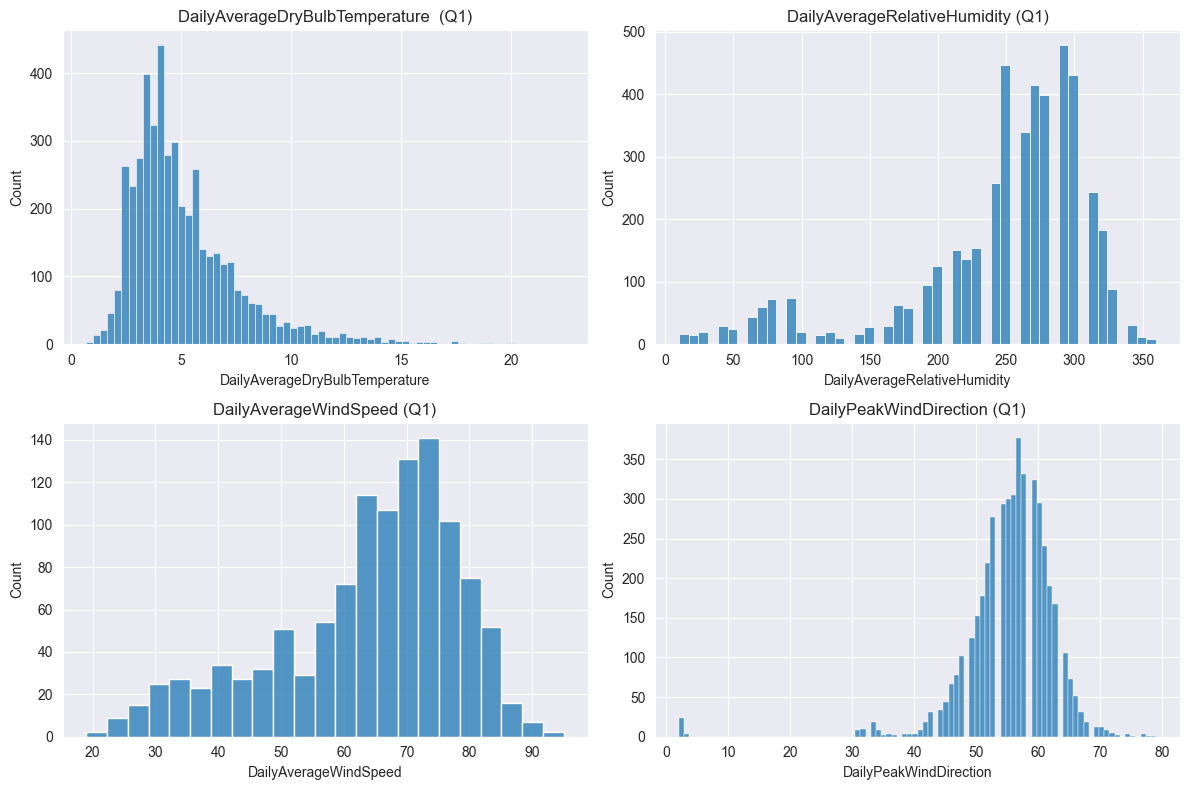

In [36]:
plot_quarterly_climate_distributions(df, 'Q1')

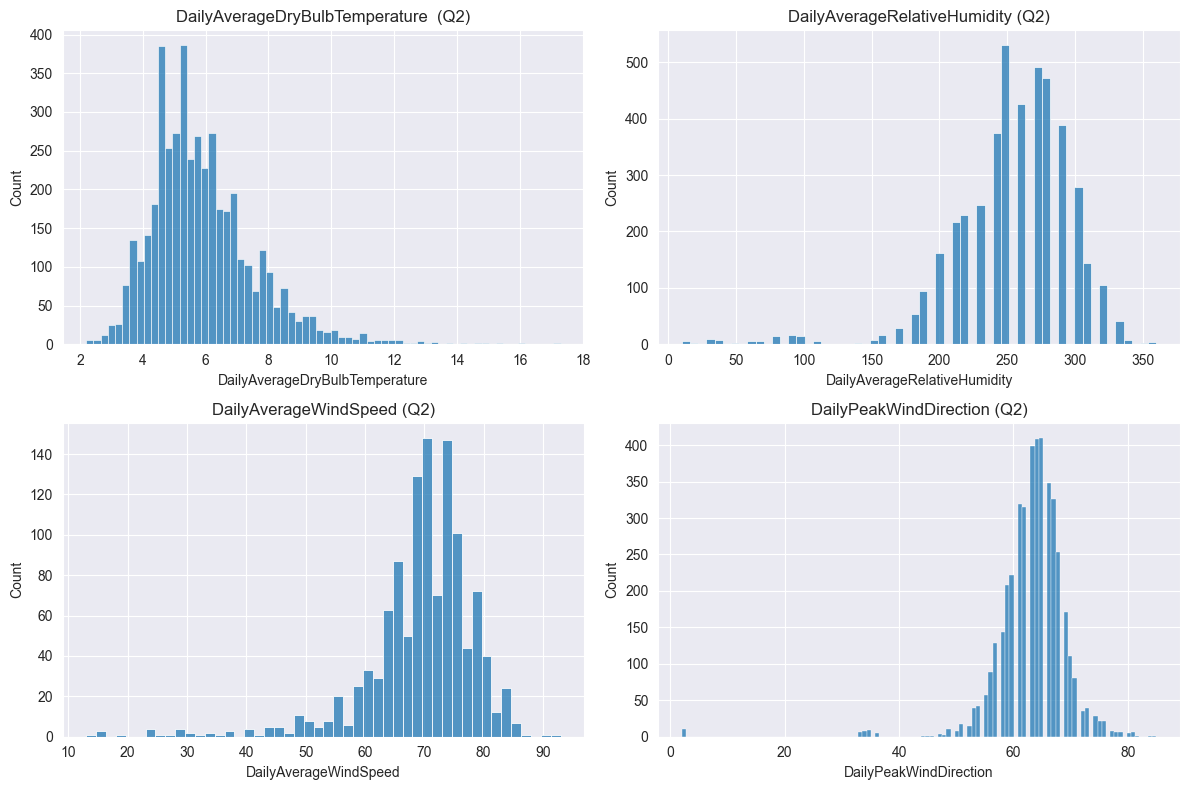

In [37]:
plot_quarterly_climate_distributions(df, 'Q2')

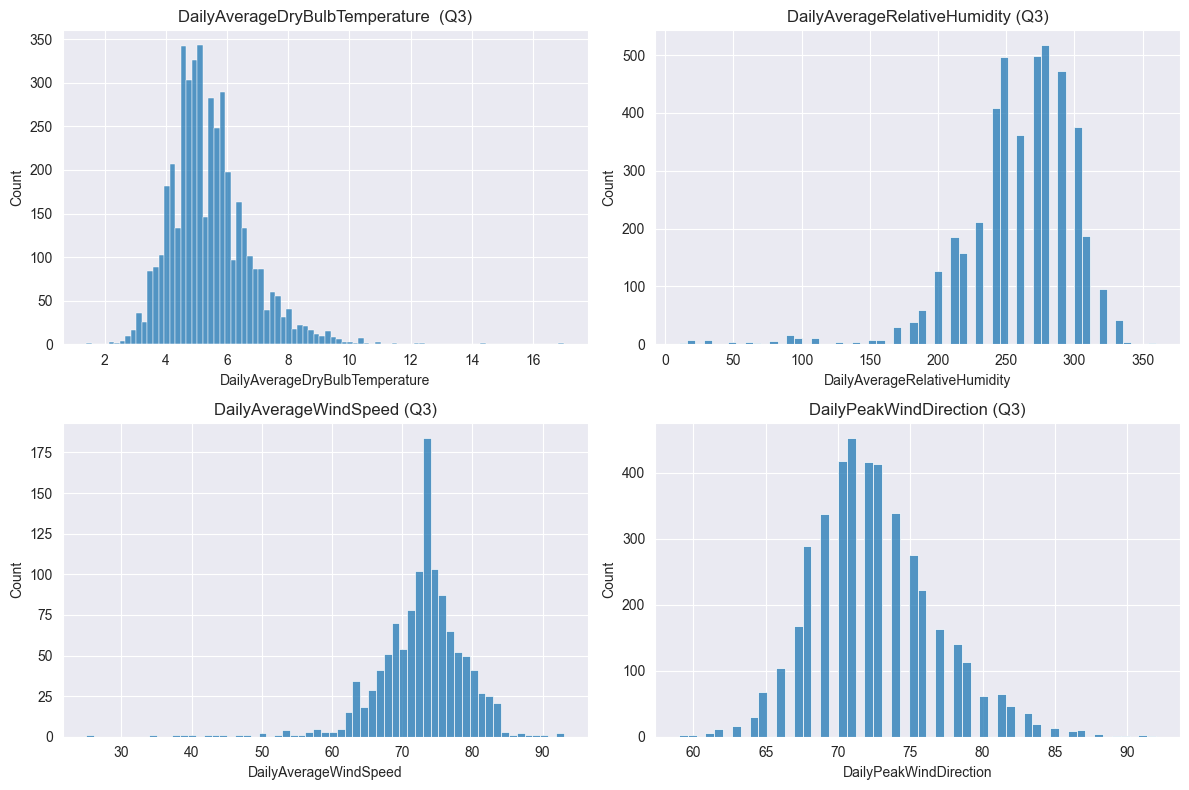

In [38]:
plot_quarterly_climate_distributions(df, 'Q3')

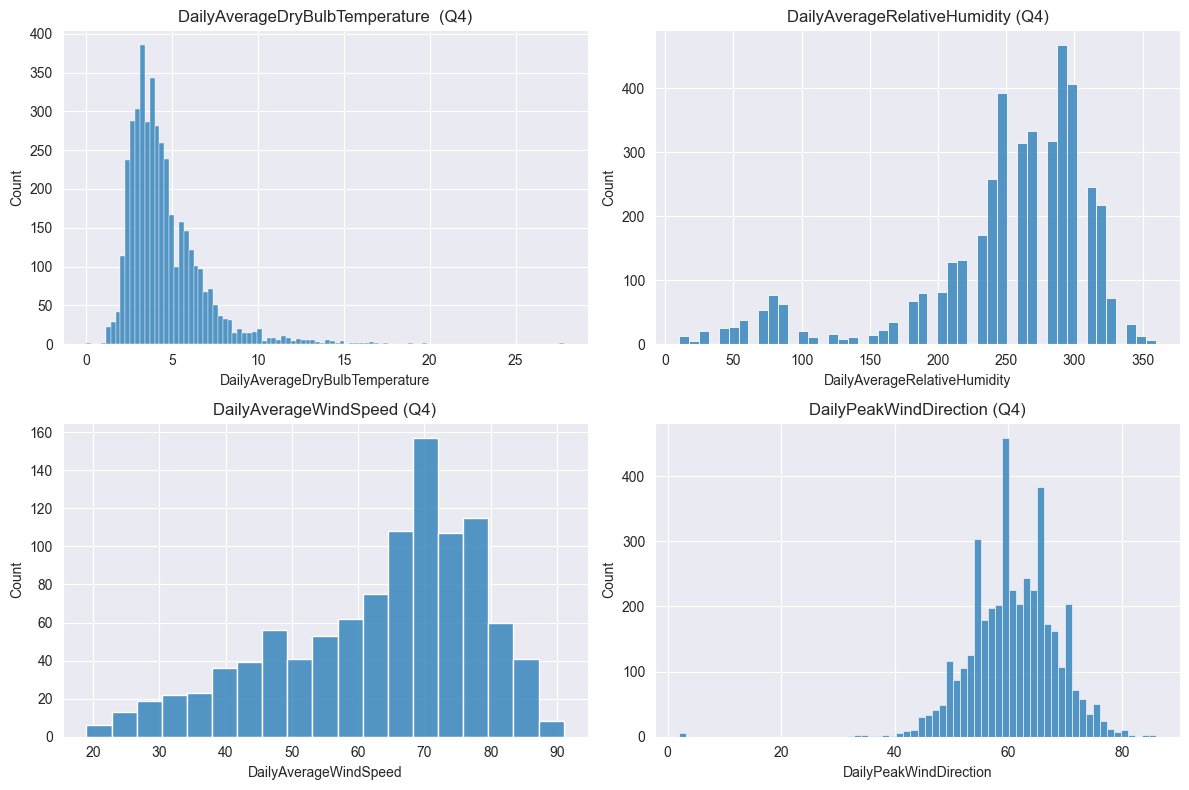

In [39]:
plot_quarterly_climate_distributions(df, 'Q4')

In [40]:
def climate_boxplots(data):

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    sns.boxplot(data=df, x='Quarter', y=features[0], ax=axes[0, 0])
    axes[0, 0].set_title(f'{features[0]} by Quarter')
    axes[0, 0].set_xlabel('Quarter')
    axes[0, 0].set_ylabel(features[0])

    sns.boxplot(data=df, x='Quarter', y=features[1], ax=axes[0, 1])
    axes[0, 1].set_title(f'{features[1]} by Quarter')
    axes[0, 1].set_xlabel('Quarter')
    axes[0, 1].set_ylabel(features[1])

    sns.boxplot(data=df, x='Quarter', y=features[2], ax=axes[1, 0])
    axes[1, 0].set_title(f'{features[2]} by Quarter')
    axes[1, 0].set_xlabel('Quarter')
    axes[1, 0].set_ylabel(features[2])

    sns.boxplot(data=df, x='Quarter', y=features[3], ax=axes[1, 1])
    axes[1, 1].set_title(f'{features[3]} by Quarter')
    axes[1, 1].set_xlabel('Quarter')
    axes[1, 1].set_ylabel(features[3])

    plt.tight_layout()
    plt.show()

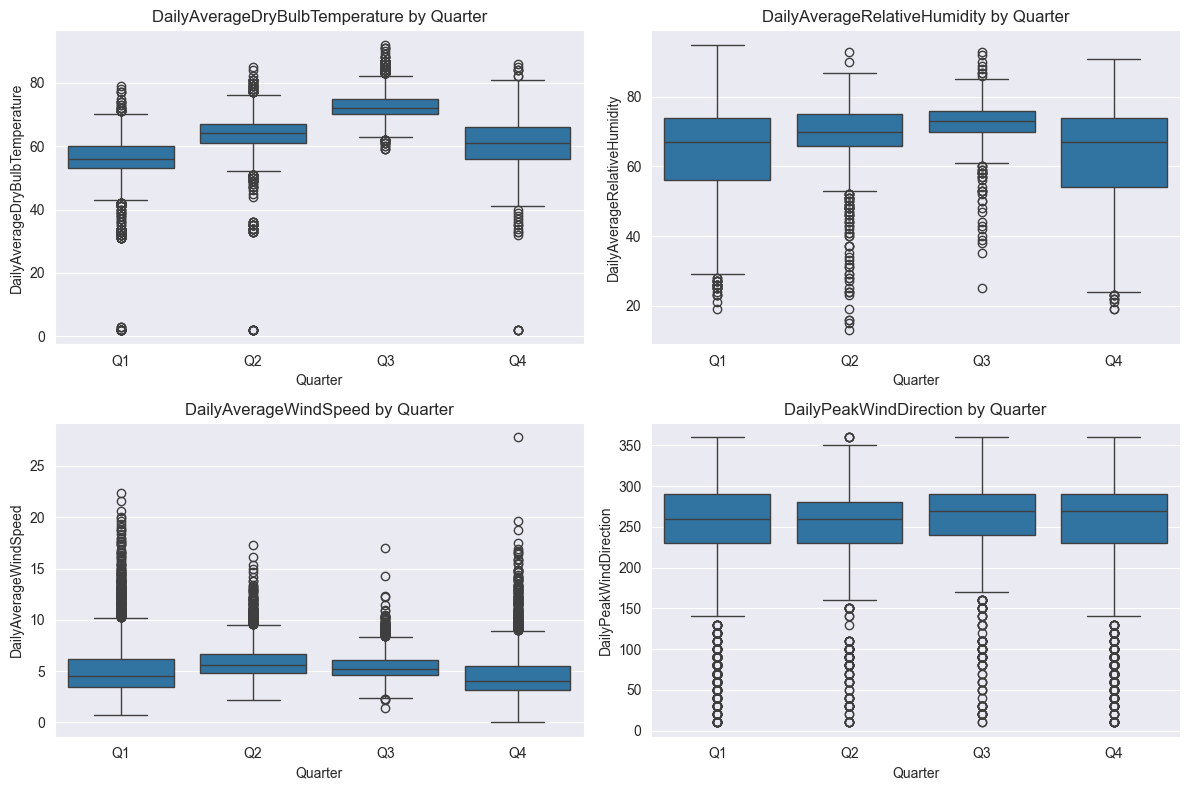

In [41]:
climate_boxplots(df)

In [43]:
def plot_fires_trend(fire_npy_grid, fire_data):

    fire_occurences_grid = np.load(fire_npy_grid)

    region_fire_data = pd.read_csv(fire_data)
    region_fire_data['acq_date'] = pd.to_datetime(region_fire_data['acq_date'])
    years = sorted(region_fire_data['acq_date'].dt.year.unique())

    if fire_occurences_grid.shape[0] != len(years):
        print("Array shape different from the number of years")

    fire_counts = fire_occurences_grid.reshape(fire_occurences_grid.shape[0], -1).sum(axis=1)

    plt.figure(figsize=(8,4))
    plt.plot(years, fire_counts, marker='o', linestyle='-')
    plt.title('Yearly Fire Occurence Trends')
    plt.xlabel('Year')
    plt.ylabel('Number of Grid Cells with Fire')
    plt.grid(True)
    plt.show()

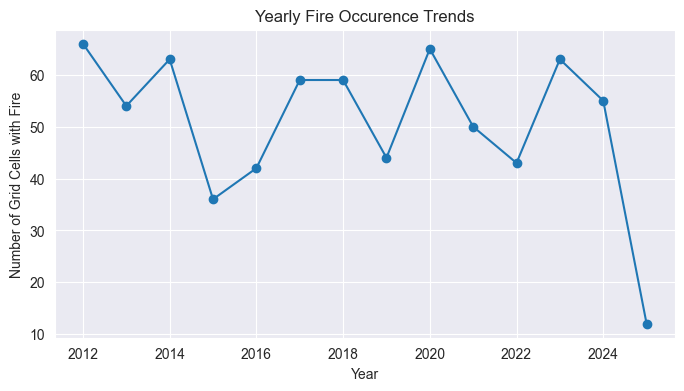

In [44]:
plot_fires_trend(
    fire_npy_grid='fire_presence_yearly_25x25_southeast_us.npy',
    fire_data='NASA_FIRMS.csv'
)

Data for 2025 is incomplete due to limited availability hence we see a sharp dip in the number of grid cells with fire per year.